### Hareketli Ortalamalar (Moving Averages)

Hareketli Ortalama, belirli bir zaman aralığındaki fiyat dizisinin ortalamasıdır. Bunun hareketli ortalama olarak tabir edilmesinin nedeni ortalamanın durağan olmayıp zaman içerisinde eklenen veriye göre hesaplanmasıdır.

Hareketli Ortalama, momentumu ölçmenin yanı sıra trendleri doğrulamanın, destek ve direnç alanlarını tanımlamanın iyi bir yoludur. Temel olarak, Hareketli Ortalamalar, tabloları yorumlamaya çalışırken “gürültüyü” yumuşatır. Gürültü, hem fiyat hem de hacim dalgalanmalarından oluşur. Hareketli Ortalama bir gecikme göstergesi olduğundan ve daha önce gerçekleşmiş olan olaylara tepki gösterdiğinden, tahmin göstergesi olarak kullanılmaz. Onaylama ve analiz için kullanılan yorumlayıcı bir göstergedir. 

Bir Hareketli Ortalama için;

- 7 ve 14 gün çok kısa
- 14 ve 21 gün kısa
- 22 ve 50 gün orta
- 50 ve 100 gün ortanın üzerinde
- 100 ve 200 gün uzun vade

**Not:** Hareketli Ortalama’nın süresi ne kadar uzun olursa, sonuç o kadar düzgün olur, ancak SMA ile kaynak arasında o kadar fazla gecikme oluşur.

Hareketli Ortalamalar, Bollinger Bantları ve MACD gibi iyi bilinen diğer teknik analiz araçlarının temelini oluşturur. Hepsi aynı temel önceliğe sahip ve değişkenlik kazandıran birkaç farklı Hareketli Ortalama türü vardır. En dikkat çekenleri Basit Hareketli Ortalama (SMA), Üstel Hareketli Ortalama (EMA) ve Ağırlıklı Hareketli Ortalama (WMA).

Hareketli Ortalamanın’nın avantajı, belirlenen periyotta fiyat hareketinin yönünü ifade eden bir hat sunmasıdır. Ek olarak fiyat hareketinin ortalamaya döneceği varsayımı düşünüldüğünde hareketli ortalama fiyat hareketini ve değerlere gidip gitmediği konusunda bilgi vericidir.

Dezavantajı ise hisse fiyatının ortalamadan çok uzaklaştığı durumda, hızlı fiyat değişikliklerine geç yanıt vermesidir.

#### Hareketli Ortalama Türleri

**1. Basit Hareketli Ortalama (SMA)** 

Basit hareketli ortalama (SMA) olarak bilinen hareketli ortalamanın en basit biçimi, belirli bir süre boyunca belirli bir dizi değerin aritmetik ortalaması alınarak hesaplanır. Başka bir deyişle, bir dizi sayı – veya finansal araçlar söz konusu olduğunda fiyatlar – toplanır ve ardından setteki fiyatların sayısına bölünür.

P = bir hisse senedinin n dönemdeki fiyatı,

n = toplam periyot sayısı olmak üzere;

SMA = (P1 + P2 + ... + Pn) / n

**2. Ağırlıklı Hareketli Ortalama (WMA)**

Ağırlıklı Hareketli Ortalama, SMA’ya benzer, ancak WMA, yeni veri noktalarına önem katar. Dönem içindeki her noktaya, o belirli veri noktasının ağırlığını veya önemini değiştiren bir çarpan (en yeni veri noktası için en büyük çarpan olacak şekilde) atanır. Daha sonra, SMA gibi ortalama alınarak hesaplanır.

WMA = (price_1 * n + price_2 * (n-1) + ... price_n) / [n * (n + 1) / 2]

**3. Üstel Hareketli Ortalama (EMA)**

Üstel Hareketli Ortalama (EMA), fiy belirli bir süre içinde nasıl değiştiğini gösteren teknik bir göstergedir. Temelde, belirlenen dönem içerisindeki fiyat hareketlerinin ortalaması alınır ama hesaplama yapılırken yakın dönemdeki fiyat hareketlerine daha fazla ağırlık verilir. Üstel hareketli ortalama (EMA), Ağırlıklı Hareketli Ortalama (WMA) gibi çalışır, ancak ondan farklı olarak ilk günlerdeki fiyat rakamlarına çok düşük önem atfetmek yerine onların da ortalamalarını alır. Yani 100 günlük bir üstel hareketli ortalama, sadece son 100 gündeki değil tüm tarihi verileri kullanmış olur. Bu yüzden de daha geçerli bir analiz yöntemidir.

In [1]:
# Gerekli kütüphane ve fonksiyonların kurulması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import yfinance as yf
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

**Veri Okuma İşlemi | Yahoo Finance**

Bir önceki yazımızda Yahoo Finance üzerinden veri çekmemizi sağlayan bir fonksiyon yazmıştık. Onun yardımıyla bir hisse senedine ait verilere erişelim.

In [2]:
def dataImporter(symbol = "", start_date = '2017-01-01', inBist = True):
    if inBist:
        symbol = symbol + ".IS"
        df = yf.download(symbol,
                         start = start_date,
                         progress = False)

    else:
        df = yf.download(symbol,
                         start = start_date,
                         progress = False)
    return df

Örneğin; APPLE hisse senedine ait verileri **df** adında bir dataframe’de tutalım.

In [3]:
df = dataImporter("AAPL", inBist = False)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952707,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922543,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059452,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361118,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611731,134247600


In [4]:
df.shape

(1870, 6)

Hisse senedine ait kapanış değerlerini görselleştirelim:

<Axes: xlabel='Date'>

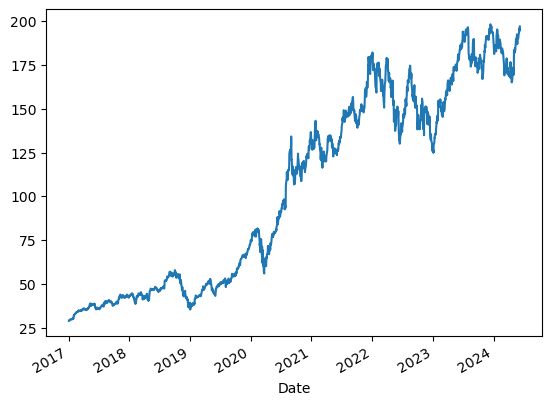

In [5]:
df["Close"].plot()

Şimdi de Hareketli Ortalamayı hesaplayalım. Pandas kütüphanesi içerisinde bulunan **rolling** fonksiyonu bizlere Hareketli Ortalama hesaplamada kolaylık sağlıyor. İçerisine girdiğimiz **window** argümanı belirlenen zaman penceresine göre kendinden önceki n tane veriyle işlem yapar. Ardından ortalaması alınarak Hareketli Ortalama hesabı yapılmış olur. Bizlerde 20 günlük Hareketli ortalama hesabı yapıp ardından görselleştirelim.

<Axes: xlabel='Date'>

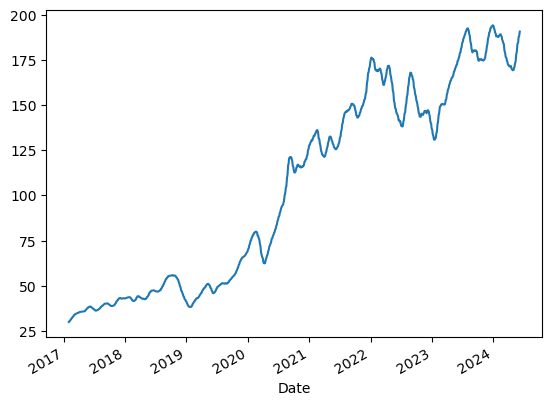

In [6]:
df['Close'].rolling(window = 20).mean().plot()

Bir de 20 günlük Hareketli Ortalama ile gerçek değerleri yan yana görelim:

<Axes: xlabel='Date'>

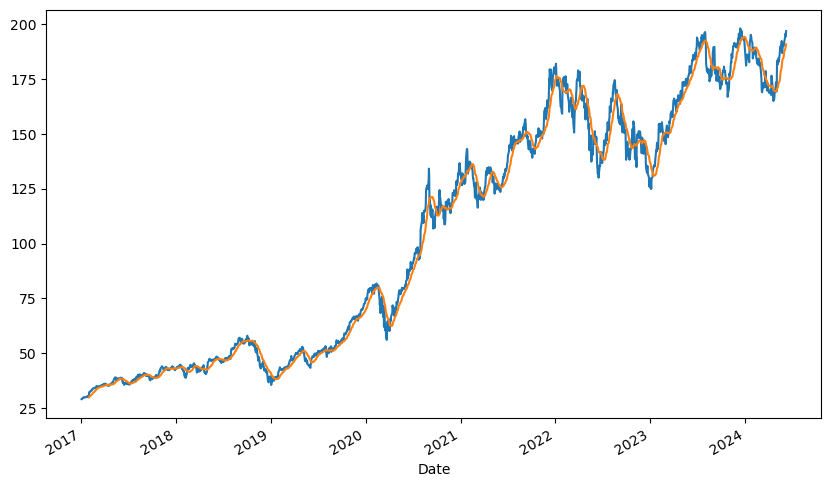

In [7]:
df['Close'].plot(figsize = (10, 6))            # Hisse senedi verilerine ait gerçek değerler -----> mavi renk
df['Close'].rolling(window = 20).mean().plot() # 20 günlük basit hareketli ortalama değerleri ----> turuncu renk

Hesapladığımız 20 günlük Hareketli Ortalamayı bir değişken olarak atayıp veri setinde nasıl gözüktüğüne bakalım:

In [8]:
df['MA'] = df['Close'].rolling(window = 20).mean()

df['MA'].head(20)

Date
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
2017-01-09        NaN
2017-01-10        NaN
2017-01-11        NaN
2017-01-12        NaN
2017-01-13        NaN
2017-01-17        NaN
2017-01-18        NaN
2017-01-19        NaN
2017-01-20        NaN
2017-01-23        NaN
2017-01-24        NaN
2017-01-25        NaN
2017-01-26        NaN
2017-01-27        NaN
2017-01-30        NaN
2017-01-31    29.8925
Name: MA, dtype: float64

#### KAYNAKLAR

[1] Mustafa Nayansak, Veri Bilimi Okulu, Python ile Finansal Veri Analizi:

[2] https://ufinaince.com/hareketli-ortalama/

[3] https://github.com/ufinaince/Hareketli-Ortalama-MA-